In [32]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pybedtools
import pandas as pd
import numpy as np
import umap
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [33]:
cluster_df = pd.read_pickle("data/iap_clustered.pkl")
methylation_df = pd.read_csv("data/IAP_LTR.blueprint_methy_ranges.tsv", sep='\t', header=0)

In [34]:
cluster_df

,chrom,start,end,element_id,length,strand,val_result,cluster_assignments
151177,chr1,95057294,95057326,151177,33,-,Untested,B
25136,chr1,20055335,20055371,25136,37,-,Untested,B
159399,chr1,100567693,100567739,159399,47,+,Untested,A
160006,chr1,100931364,100931413,160006,50,+,Untested,A
91370,chr1,60586644,60586694,91370,51,-,Untested,B
...,...,...,...,...,...,...,...,...
4180871,chr9,92734665,92742098,4180871,7434,-,Untested,C
4041241,chr9,19763109,19770697,4041241,7589,-,Untested,A
4069873,chr9,36157171,36165366,4069873,8196,+,Untested,A
4041384,chr9,19897067,19906574,4041384,9508,+,Untested,A


In [35]:
methylation_df

,element.ID,side,B.range1,B.range2,T.range1,T.range2,mean1,mean2,strand,edge
0,28,left,0.040000,0.025641,0.038462,0.032258,0.039231,0.028950,-,3'
1,28,right,0.089552,0.052910,0.040000,0.021970,0.064776,0.037440,-,5'
2,182,left,0.094775,0.066667,0.056489,0.023830,0.075632,0.045248,-,3'
3,182,right,0.064516,0.044556,0.071429,0.032762,0.067972,0.038659,-,5'
4,1272,left,0.072673,0.043214,0.087302,0.021662,0.079987,0.032438,-,3'
...,...,...,...,...,...,...,...,...,...,...
15156,4498998,right,NaN,NaN,0.127660,0.018169,NaN,NaN,-,5'
15157,4503009,right,NaN,NaN,0.047619,0.029412,NaN,NaN,-,5'
15158,4504459,right,NaN,NaN,0.108696,0.060000,NaN,NaN,-,5'
15159,4646501,left,NaN,NaN,0.218750,0.059180,NaN,NaN,-,3'


In [36]:
methylation_df = methylation_df.loc[methylation_df["side"] == "right", :]
methylation_df.index = methylation_df["element.ID"].astype(int).to_list()
methylation_df

,element.ID,side,B.range1,B.range2,T.range1,T.range2,mean1,mean2,strand,edge
28,28,right,0.089552,0.052910,0.040000,0.021970,0.064776,0.037440,-,5'
182,182,right,0.064516,0.044556,0.071429,0.032762,0.067972,0.038659,-,5'
1272,1272,right,0.066227,0.033333,0.127473,0.048485,0.096850,0.040909,-,5'
1427,1427,right,0.083333,0.073171,0.054054,0.031438,0.068694,0.052304,-,5'
1979,1979,right,0.053571,0.038462,0.108696,0.081633,0.081134,0.060047,-,5'
...,...,...,...,...,...,...,...,...,...,...
4488835,4488835,right,NaN,NaN,0.153846,0.077273,NaN,NaN,+,3'
4498998,4498998,right,NaN,NaN,0.127660,0.018169,NaN,NaN,-,5'
4503009,4503009,right,NaN,NaN,0.047619,0.029412,NaN,NaN,-,5'
4504459,4504459,right,NaN,NaN,0.108696,0.060000,NaN,NaN,-,5'


In [37]:
cluster_df["b_range"] = methylation_df["B.range1"]
cluster_df["t_range"] = methylation_df["T.range1"]
label_order = ["A", "B", "C", "D", "E"]

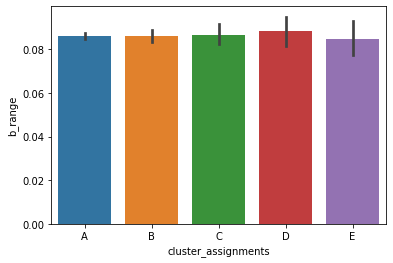

In [38]:
sns.barplot(x="cluster_assignments", y="b_range", order=label_order, data=cluster_df)

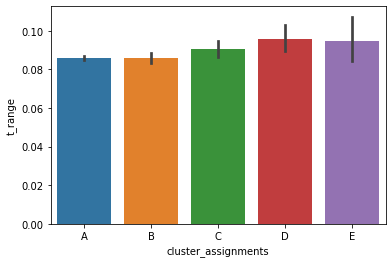

In [39]:
sns.barplot(x="cluster_assignments", y="t_range", order=label_order, data=cluster_df)